# Activity 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Activity 2

In [3]:
df = pd.read_csv('E:/VSCode/Python/Machine_Learning/Data/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, -1:].values

print(X.shape, y.shape)

(400, 2) (400, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 2) (80, 2)
(320, 1) (80, 1)


In [5]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)

X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min)

# Activity 3

In [6]:
g = lambda z : np.exp(z) / (1 + np.exp(z))

def predict_prob(X, w):
    z = np.dot(X, w.T)
    return g(z)

def predict(X, w):
    y_hat = predict_prob(X, w)
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return y_hat

In [7]:
def loss(X, y, w):
    y_hat = predict_prob(X, w)
    l = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    return -np.mean(l)

In [8]:
def grad(X, y, w):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw.T

In [9]:
def gradient_descent(X, y, lr=0.02, epochs=1000):
    w = np.zeros((1, X.shape[1]))
    losses = []
    for i in range(epochs):
        dw = grad(X, y, w)
        w -= lr * dw
        losses.append(loss(X, y, w))
    return losses, w

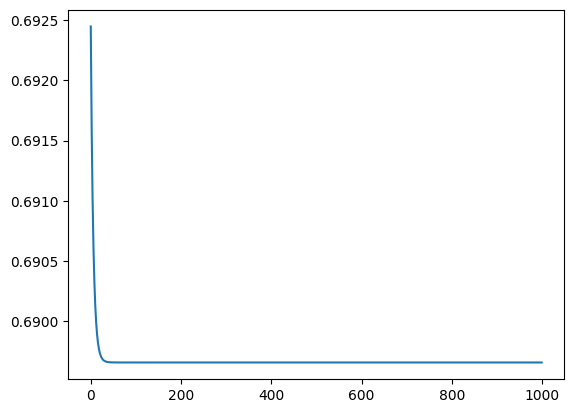

In [10]:
loss, w = gradient_descent(X_train_scaled, y_train)
plt.plot(loss)

# Activity 4

## Cau 1

In [11]:
y_pred = predict(X_test_scaled, w)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy: 0.65
Recall: 0.5714285714285714
Precision: 0.5


## Cau 2

In [12]:
class LogisticRegression1:
    def __init__(self, lr=0.02, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.losses = []

    def g(self, z):
        return np.exp(z) / (1 + np.exp(z))

    def predict_prob(self, X):
        z = np.dot(X, self.w.T)
        return self.g(z)

    def predict(self, X):
        y_hat = self.predict_prob(X)
        y_hat = np.where(y_hat >= 0.5, 1, 0)
        return y_hat

    def loss(self, X, y):
        y_hat = self.predict_prob(X)
        l = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return -np.mean(l)

    def grad(self, X, y):
        y_hat = self.predict_prob(X)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw.T

    def fit(self, X, y):
        self.w = np.zeros((1, X.shape[1]))
        for i in range(self.epochs):
            dw = self.grad(X, y)
            self.w -= self.lr * dw
            self.losses.append(self.loss(X, y))

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        print(f'Accuracy: {accuracy_score(y, y_pred)}')
        print(f'Recall: {recall_score(y, y_pred)}')
        print(f'Precision: {precision_score(y, y_pred)}')

Accuracy: 0.65
Recall: 0.5714285714285714
Precision: 0.5


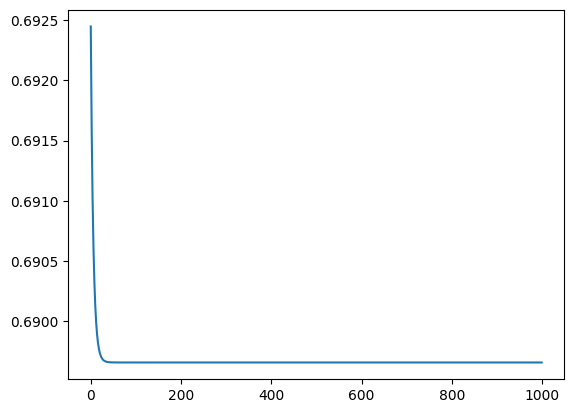

In [13]:
model = LogisticRegression1()
model.fit(X_train_scaled, y_train)
model.evaluate(X_test_scaled, y_test)
plt.plot(model.losses)

## Cau 3

In [14]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.losses = []

    def g(self, z):
        return np.exp(z) / (1 + np.exp(z))

    def predict_prob(self, X):
        z = np.dot(X, self.w.T)
        return self.g(z)

    def predict(self, X):
        y_hat = self.predict_prob(X)
        y_hat = np.where(y_hat >= 0.5, 1, 0)
        return y_hat

    def loss(self, X, y):
        y_hat = self.predict_prob(X)
        l = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return -np.mean(l)

    def grad(self, X, y):
        y_hat = self.predict_prob(X)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw.T

    def fit(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.w = np.zeros((1, X_bias.shape[1]))
        for i in range(self.epochs):
            dw = self.grad(X_bias, y)
            self.w -= self.lr * dw
            self.losses.append(self.loss(X_bias, y))

    def evaluate(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        y_pred = self.predict(X_bias)
        print(f'Accuracy: {accuracy_score(y, y_pred)}')
        print(f'Recall: {recall_score(y, y_pred)}')
        print(f'Precision: {precision_score(y, y_pred)}')

Accuracy: 0.8875
Recall: 0.75
Precision: 0.9130434782608695


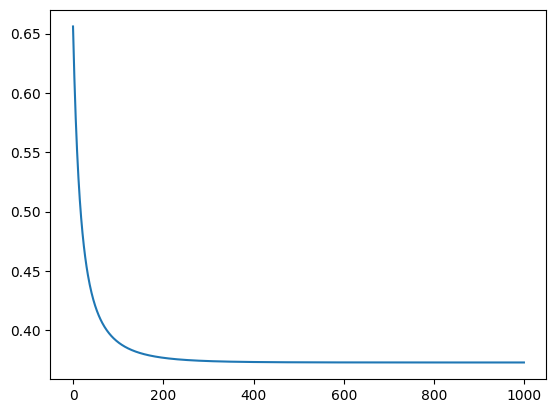

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.evaluate(X_test_scaled, y_test)
plt.plot(model.losses)